### Standardization and Transformation:
Algorithm like Linear Regr , KNN , K-values require transformation of values into minimum value for producing o/p faster.
	1. Linear Regression -- Gradient descent , Global minima 
	2. KNN , K-means and Hierarichal clustering -- Euclidean Distance
	In Deep learning:
		-ANN --> Global Mini , Gradient descent
		-CNN --> Since images are used the value is didvided by 255
		-RNN --> 

#### Types of transformation:
1. Normalization and Standardization
2. Scaling to minimum and maximum values
3. Scaling to median and Quantiles
4. Gaussian Transformation 
        -Logarithmic transformation
        -Reciprocal transformation
        -Square root transformation
        -Exponential transformation
        -Box cox transformation

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Standardization: (Most used)
Trying to bring all the variables to a similar scale.
Standardization means centering the variables to zero. X_scaled = (x-x_mean)/std

In [2]:
Titanic = pd.read_csv('train.csv',usecols=['Pclass','Age','Fare','Survived'])

In [3]:
Titanic.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
Median = Titanic['Age'].median()
Titanic['Age'].fillna(Median,inplace=True)

In [5]:
Titanic.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [6]:
### For standardization : Use Standardscaler from sklearn library
Scaler = StandardScaler()
Transformed = Scaler.fit_transform(Titanic)

In [7]:
# The values are Standardized - (x-x_mean)/std is applied:
df_scaled = pd.DataFrame(Transformed)

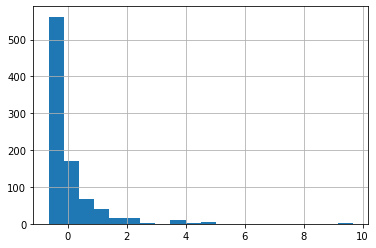

In [8]:
# 3 represents fare - has got a lot of outliers: (Right skew)
df_scaled[3].hist(bins=20)

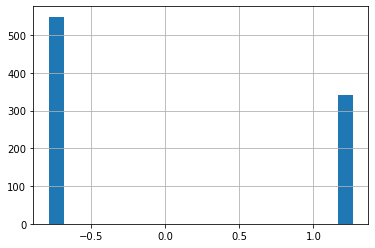

In [9]:
df_scaled[0].hist(bins=20)

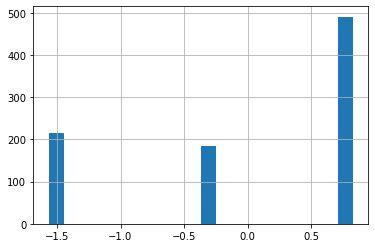

In [10]:
df_scaled[1].hist(bins=20)

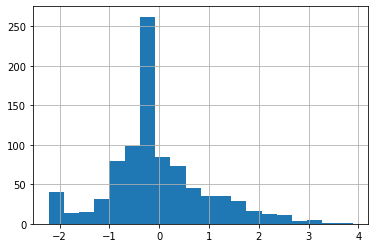

In [11]:
df_scaled[2].hist(bins=20)

### Min max scaling  
Min max scaling scales the value between 0 to 1.
X_scaled = (X - X_min)/(X_max - X_min)

In [12]:
Min_max = MinMaxScaler()
Min_maxx = Min_max.fit_transform(Titanic)
Min_max_df = pd.DataFrame(Min_maxx,columns=Titanic.columns) 

In [13]:
Min_max_df.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


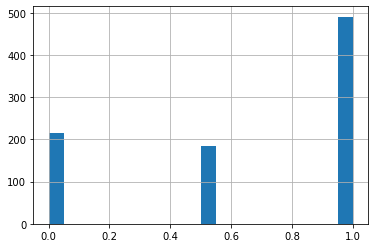

In [14]:
Min_max_df['Pclass'].hist(bins=20)

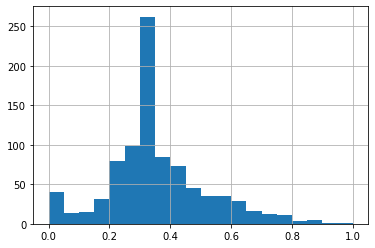

In [15]:
Min_max_df['Age'].hist(bins=20)

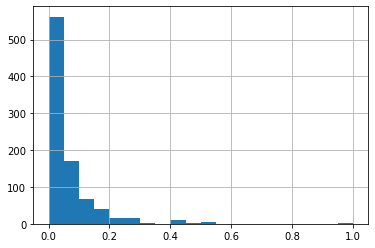

In [16]:
Min_max_df['Fare'].hist(bins=20)

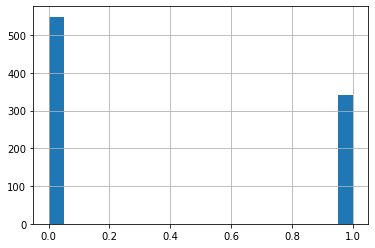

In [17]:
Min_max_df['Survived'].hist(bins=20)

### Robust Scaler 
It is used to scale the features to median and quantiles.Scaling using median and quantiles consists subtracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile , 

X scaled = (X - X.median) / IQR

In [18]:
from sklearn.preprocessing import RobustScaler

In [19]:
Scaler = RobustScaler()
Rb_Scaler = Scaler.fit_transform(Titanic)
Rb_Scaler_df = pd.DataFrame(Rb_Scaler,columns=Titanic.columns)

In [20]:
Rb_Scaler_df.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


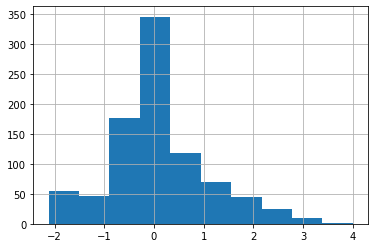

In [21]:
Rb_Scaler_df['Age'].hist()

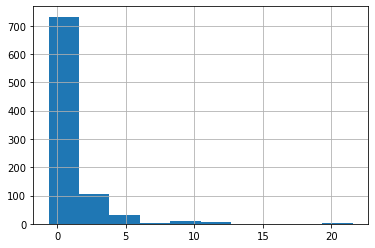

In [22]:
Rb_Scaler_df['Fare'].hist()

#### Gaussian Transformation 
Some ML algorithms assume that the features are normally distributed. If they are normally distributed , they provide us Good accuracy and 
performance. To convert features into normal dirtribution , Guassian transformation is used.

        -Logarithmic transformation
        -Reciprocal transformation
        -Square root transformation
        -Exponential transformation
        -Box cox transformation

In [23]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [24]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [25]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [26]:
import scipy.stats as stat
import pylab

In [27]:
####To check whether data is normally distributed or guassian distributed , we perform Q-Q plot
## Rightside graph is Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,7))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

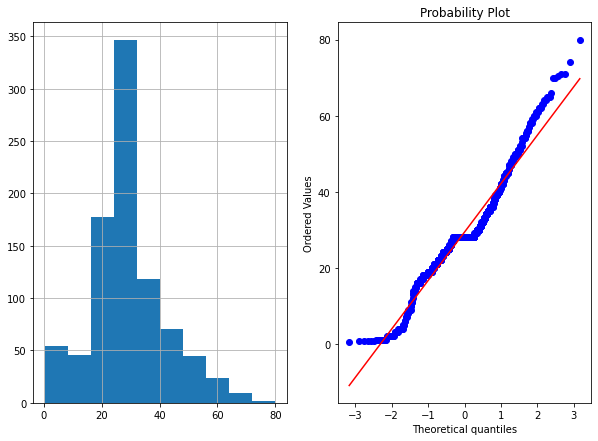

In [28]:
plot_data(df,'Age')

#### Logarithmic transformation (Works well on Right or left skewed values)

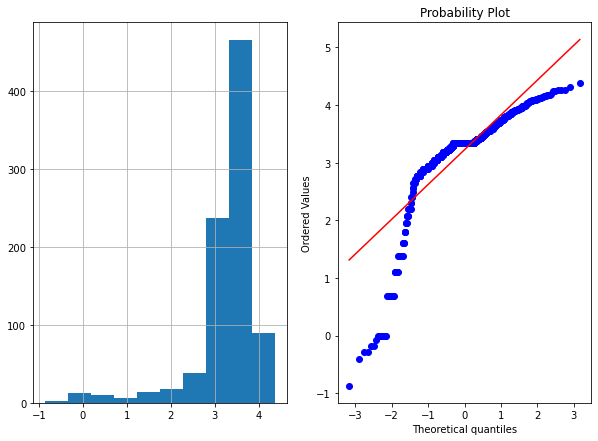

In [29]:
df['Age_log'] = np.log(df['Age'])
plot_data(df,'Age_log')

#### Reciprocal transformation:

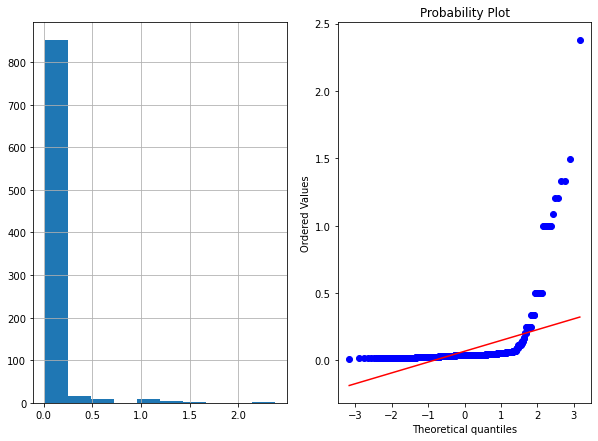

In [30]:
df['Age_reciprocal'] = 1/df['Age']
plot_data(df,'Age_reciprocal')

#### Sqrt Transformation:

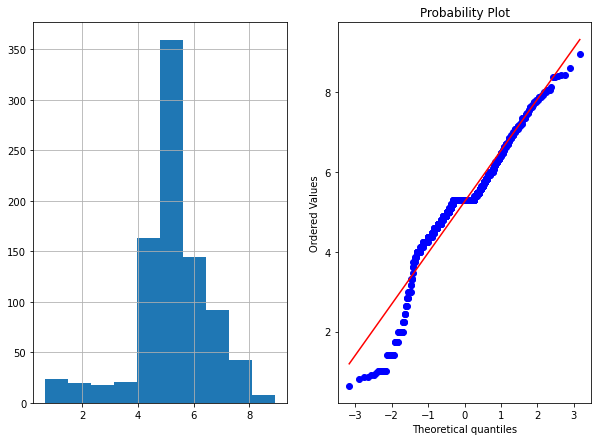

In [31]:
df['Age_sqrt'] = df['Age']**(0.5)
plot_data(df,'Age_sqrt')

#### Exponential transformation

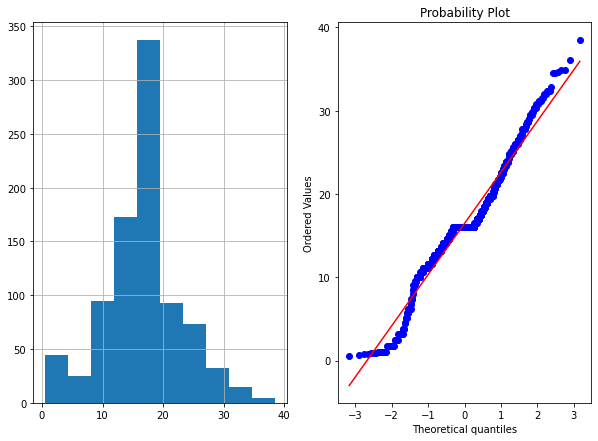

In [32]:
df['Age_exponential'] = df['Age']**(1/1.2)
plot_data(df,'Age_exponential')

#### Box cox tranformation

The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)-1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from 5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [33]:
df['Age_boxcox'],parameters = stat.boxcox(df['Age'])

In [34]:
#parameters is lambda:
print(parameters)

0.7964531473656952


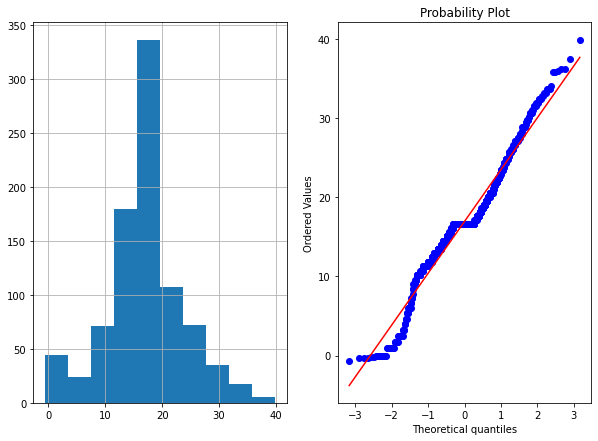

In [35]:
plot_data(df,'Age_boxcox')

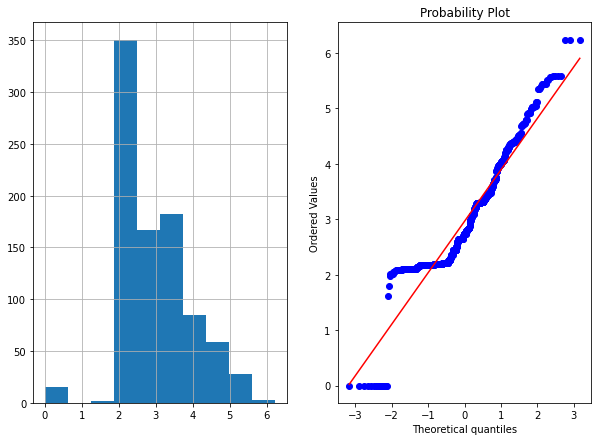

In [36]:
### Fare: Fare has some 0 values , log(0) is infinity , so log1p is used
df['Fare_log'] = np.log1p(df['Fare'])
plot_data(df,'Fare_log')

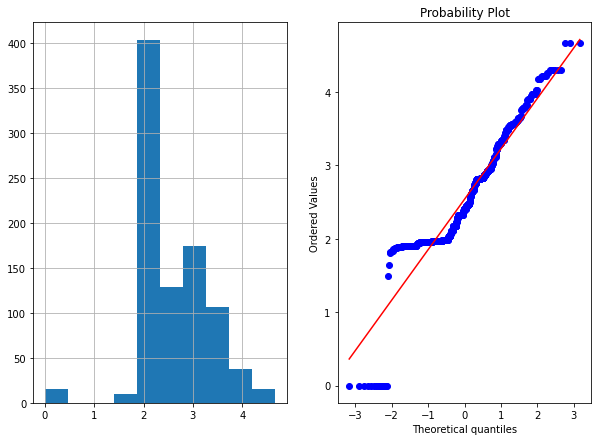

In [39]:
#Fare with Box cox:
df['Fare_boxcox'],parameters = stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_boxcox')